In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration

In [2]:
file = "C:/Users/xfilh/Documents/Kaggle_Dados/nissan-dataset.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [4]:
df.describe()

,id,age,performance,km,price
count,10000.00000,9154.000000,9143.000000,9141.000000,9159.000000
mean,5000.50000,43.041730,197.783332,503033.441418,27365.125341
std,2886.89568,14.776421,112.779620,284967.128714,13598.200111
min,1.00000,18.000000,0.000000,808.000000,5000.250000
25%,2500.75000,31.000000,101.500000,258002.000000,15956.490000
50%,5000.50000,43.000000,196.000000,500903.000000,27296.050000
75%,7500.25000,56.000000,296.000000,748421.000000,38370.190000
max,10000.00000,69.000000,399.000000,999915.000000,223980.330000


In [5]:
df.isnull().sum()

id               0
full_name      843
age            846
gender         856
model          870
color          861
performance    857
km             859
condition      849
price          841
dtype: int64

In [6]:
df = df.dropna()

#### Retirando colunas sem valor para a análise

In [7]:
dropout = ['id', 'full_name']
df = df.drop(dropout, axis=1)

In [8]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,gender,model,color,condition
0,Male,Quest,Mauv,very bad
1,Polygender,R'nessa,Orange,old
2,Male,March / Micra,Teal,bad
3,Male,Gloria,Green,very good
4,Male,Avenir,Khaki,old


In [9]:
for col in df_obj:
    moda = df_obj[col].mode()
    print(moda)
    

0    Male
Name: gender, dtype: object
0    Juke
Name: model, dtype: object
0    Red
Name: color, dtype: object
0    bad
Name: condition, dtype: object


# DataViz

In [10]:
for col in df:
    freq = df[col].value_counts().reset_index()
    freq.columns = [col, 'Frequency']
    
    fig = px.bar(freq, x=col, y='Frequency', title=f'Frequency on column {col},', color=col)
    fig.show()

In [11]:
#sns.histplot(data=df, x='price')
fig = px.histogram(data_frame=df, x='price')
fig.show()

In [12]:
#sns.histplot(data=df, x='km')
fig = px.histogram(data_frame=df, x='km')
fig.show()

#### Check the IQR for each numeric column

In [13]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,age,performance,km,price
0,42.0,299.0,509305.0,40394.91
1,54.0,109.0,965853.0,8687.90
2,37.0,52.0,380906.0,44705.31
3,55.0,336.0,573171.0,32889.88
4,21.0,2.0,809470.0,6949.22


In [14]:
for col in df_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    print(f"Q1: {q1} and Q3: {q3} of Column {col}\nIQR: {IQR}")

    #plt.figure(figsize=(8, 6))
    #sns.boxplot(x=df[col])
    #plt.title(f'Boxplot of {col} with IQR')
    #plt.show()
    fig = px.box(data_frame=df_num, x=df_num[col], title=f'Boxplot of {col} with IQR')
    fig.show()

Q1: 31.0 and Q3: 56.0 of Column age
IQR: 25.0


Q1: 102.0 and Q3: 296.0 of Column performance
IQR: 194.0


Q1: 258709.0 and Q3: 749260.0 of Column km
IQR: 490551.0


Q1: 15960.5 and Q3: 38385.63 of Column price
IQR: 22425.129999999997


#### Replacing outliers with median

<Axes: >

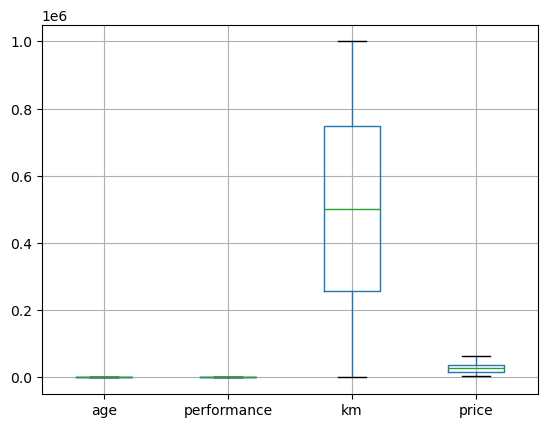

In [15]:
for col in df_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lim_inf = q1 - 1.5 * IQR
    lim_sup = q3 + 1.5 * IQR

    median_col = df[col].median()

    df_num.loc[(df_num[col] < lim_inf) | (df[col] > lim_sup), col]  = median_col

df_num.boxplot()

# Predicting Price with Random Forest Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
# Define feat
#encode cate values
obj_enco = pd.get_dummies(df_obj, dtype=int)
obj_enco.head()

,gender_Agender,gender_Bigender,gender_Female,gender_Genderfluid,gender_Genderqueer,gender_Male,gender_Non-binary,gender_Polygender,model_370Z,model_AD,...,color_Turquoise,color_Violet,color_White,color_Yellow,condition_bad,condition_good,condition_new,condition_old,condition_very bad,condition_very good
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# checkinh shape of dataframes
df_obj.shape


(9053, 4)

In [19]:
df_num.shape

(9053, 4)

#### Creating one dataframe encoded

In [20]:
df_joined = df_num.join(obj_enco, how='inner')
df_joined.head()

,age,performance,km,price,gender_Agender,gender_Bigender,gender_Female,gender_Genderfluid,gender_Genderqueer,gender_Male,...,color_Turquoise,color_Violet,color_White,color_Yellow,condition_bad,condition_good,condition_new,condition_old,condition_very bad,condition_very good
0,42.0,299.0,509305.0,40394.91,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,54.0,109.0,965853.0,8687.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,37.0,52.0,380906.0,44705.31,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,55.0,336.0,573171.0,32889.88,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,21.0,2.0,809470.0,6949.22,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
X = df_joined.drop(columns=['price'])

In [22]:
y = df_joined['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [24]:
model = RandomForestRegressor(random_state=2, n_estimators=200)

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2)

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 176405463.79125652
RMSE: 13281.771861888628


In [28]:
df_plot = pd.DataFrame()

In [29]:
df_plot['real'] = y_test
df_plot['pred'] = y_pred
df_plot.reset_index(inplace=True, drop=True)
df_plot.head()

,real,pred
0,41795.88,31886.50600
1,49179.22,23607.40180
2,11131.32,31352.85510
3,43631.78,24917.04615
4,30264.86,29587.70465


In [30]:
fig = px.scatter(df_plot, x='real', y='pred', title='Predict values vs Real Values', labels={'x': 'Real Values', 'y': 'Predict Values'})
fig.add_shape(type='line', line=dict(dash='dash'), x0=min(y_test), y0=min(y_test), x1=max(y_test), y1=max(y_test))